<a href="https://colab.research.google.com/github/grant88/education/blob/main/functions_and_work_with_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

**Задание 1**

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [6]:
try:
    ratings = pd.read_csv("content/ratings.csv")
except:
    from google.colab import files
    print("Загрузите файл с рейтингами")
    ratings_uploaded = files.upload()
    ratings_filename = list(ratings_uploaded.keys())[0]
    ratings = pd.read_csv(f"/content/{ratings_filename}")

Загрузите файл с рейтингами


Saving ratings.csv to ratings.csv


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
def rating_class(rating: float) -> str:
    """
    Функция классифицирует рейтинг фильма (rating) по следующим правилам:

        оценка 2 и меньше - низкий рейтинг
        оценка 4 и меньше - средний рейтинг
        оценка 4.5 и 5 - высокий рейтинг
    """
    if rating <= 2.0:
        return "низкий"
    elif rating <= 4.0:
        return "средний"
    elif 4.5 <= rating <= 5.0:
        return "высокий"
    else:
        raise ValueError("Can't match rating to class")

In [9]:
ratings["class"] = ratings['rating'].apply(rating_class)

In [10]:
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний
1,1,1029,3.0,1260759179,средний
2,1,1061,3.0,1260759182,средний
3,1,1129,2.0,1260759185,низкий
4,1,1172,4.0,1260759205,средний


**Задание 2**

Входные данные - файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Результат классификации запишите в отдельный столбец region.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [11]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [12]:
try:
    keywords = pd.read_csv("content/keywords.csv")
except:
    from google.colab import files
    print("Загрузите файл с поисковыми запросами")
    keywords_uploaded = files.upload()
    keywords_filename = list(keywords_uploaded.keys())[0]
    keywords = pd.read_csv(f"/content/{keywords_filename}")

Загрузите файл с поисковыми запросами


Saving keywords.csv to keywords.csv


In [13]:
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [14]:
def get_region(keyword: str) -> str:
    # города в geo_data должны быть уникальны
    for region, cities in geo_data.items():
        for city in cities:
            if city in keyword:
                return region
    else:
        return "undefined"

In [15]:
keywords["region"] = keywords["keyword"].apply(get_region)

Проверки

In [16]:
keywords["region"].value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

In [17]:
keywords[keywords["region"] != "undefined"].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


**Задание 3 (бонусное)**

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы [MovieLens](https://grouplens.org/datasets/movielens/)). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

   1. для каждой строки пройдите по всем годам списка years
   2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
   3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [18]:
try:
    movies = pd.read_csv("content/movies.csv")
except:
    from google.colab import files
    print("Загрузите файл с фильмами")
    movies_uploaded = files.upload()
    movies_filename = list(movies_uploaded.keys())[0]
    movies = pd.read_csv(f"/content/{movies_filename}")

Загрузите файл с фильмами


Saving movies.csv to movies.csv


In [19]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
years = [str(x) for x in range(1950, 2011)]

In [21]:
def production_year(title: str) -> str:
    for year in years:
        if year in title:
            return year
    else:
        return "1900"

In [22]:
movies["year"] = movies["title"].apply(production_year)

In [23]:
ratings_years = movies.merge(ratings, on="movieId")[["year","rating"]]

In [24]:
result = ratings_years.groupby("year").mean()

In [25]:
result.sort_values("rating", ascending=False).head()

,rating
year,
1957,4.014241
1972,4.011136
1952,4.000000
1954,3.994220
1951,3.983539


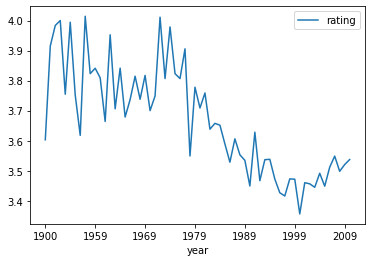

In [26]:
result.plot.line(y='rating')

**Вывод:**

Утверждение, что с ростом года выпуска фильма его средний рейтинг становится ниже, верно.